In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    data = pd.read_csv("data/Wholesale customers data.csv")
    # drop non continuous labels
    data.drop(labels=(['Channel','Region']),axis=1,inplace=True)
    print('Wholesale customers has {} samples with {} features each'.format(*data.shape))
except:
    print('Dataset could not be loaded.')

Wholesale customers has 440 samples with 6 features each


# Data preprocessing

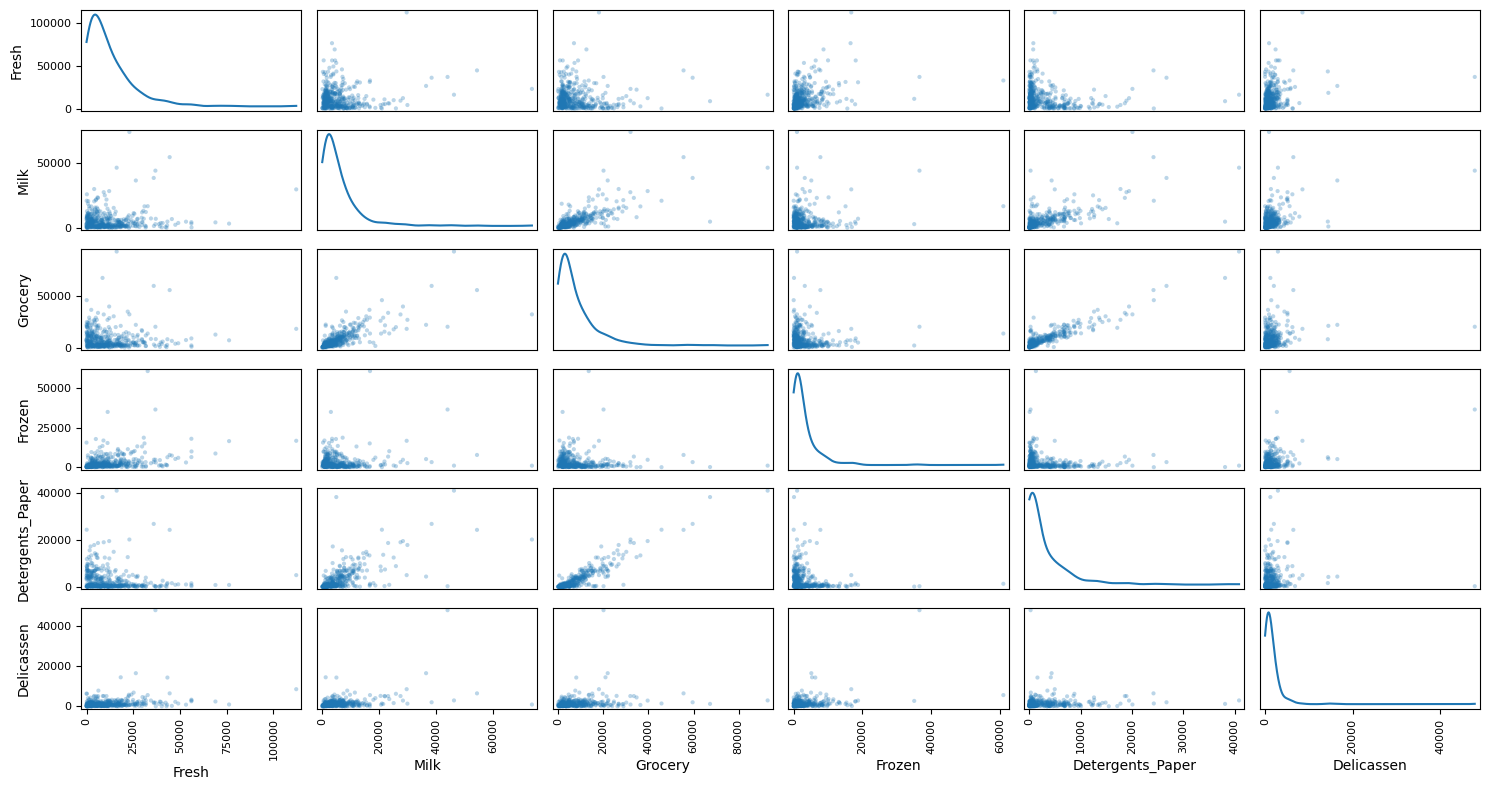

In [3]:
pd.plotting.scatter_matrix(data, alpha=0.3,figsize=(15,8),diagonal='kde' )
plt.tight_layout()

Data preprocessing

Now we will start to preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results we obtain from your analysis are significant and meaningful.

Since the ploted data is clearly left-skewed, we applied a log scale to normalize the data.

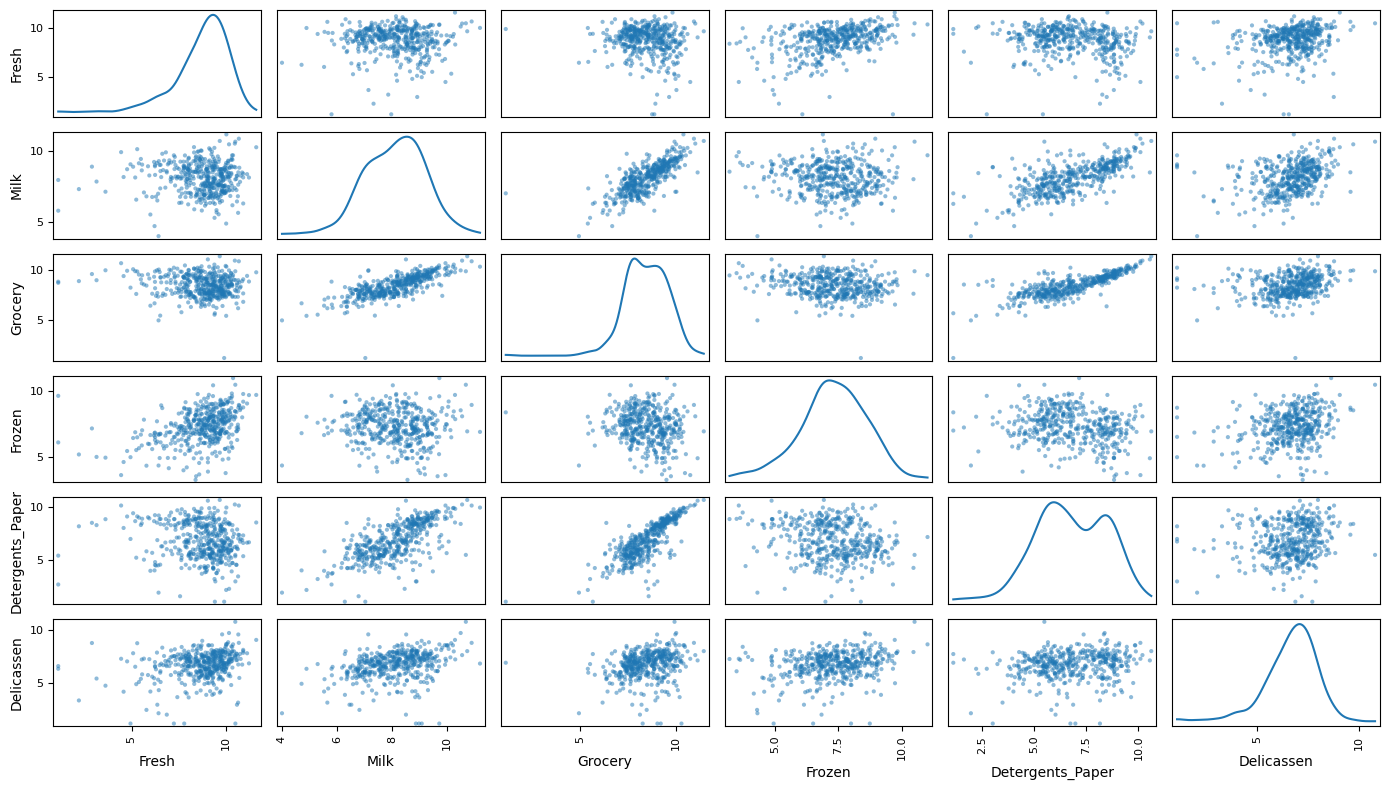

In [4]:
# Scale the data using the natural logarithm
log_data = np.log(data.copy())

pd.plotting.scatter_matrix(log_data, alpha=0.5, figsize=(14,8),diagonal='kde')
plt.tight_layout()

In [5]:
#change panda dataframe to array
log_data = log_data.iloc[np.arange(440)].values

After log scaled, each feature appear much more normal distribution.

In this plot we can see:
* Milk have corelation with Grocery, Detergents_Paper and Delicaseen.
* The pair of features with the highest correlation are Detergents_Paper and Grocery 

# Clustering

In [38]:
_x, _y, _z = [int(0), int(1), int(3)]

## K-Mean

In [60]:
from models.kMeans import kMeans
from sklearn.cluster import KMeans

c:\Users\HH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

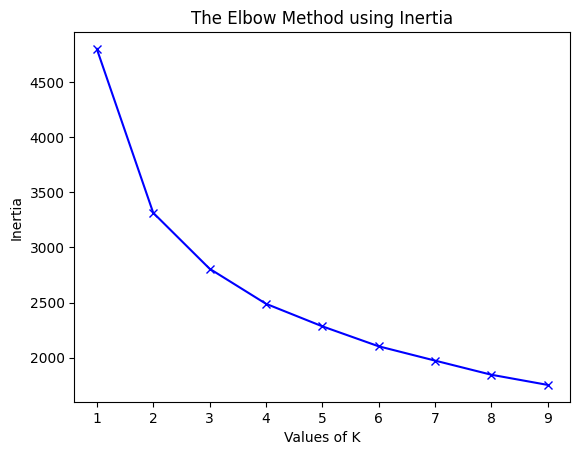

In [61]:
K = range(1, 10)
inertias = []
for k in K:
    km = KMeans(n_clusters=k).fit(log_data)
    inertias.append(km.inertia_)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

{2}


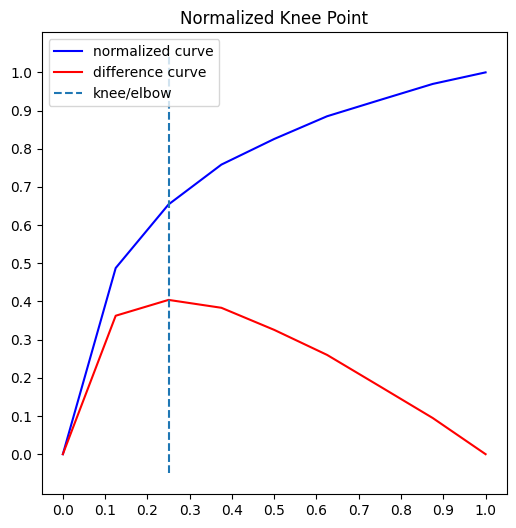

In [65]:
from kneed import KneeLocator
kneedle = KneeLocator(range(len(inertias)), 
                      inertias, 
                      S=1,
                      curve="convex",
                      direction="decreasing")
print(kneedle.all_elbows)
kneedle.plot_knee_normalized()

In [68]:
idx, centroid = kMeans(log_data, 2, 20)

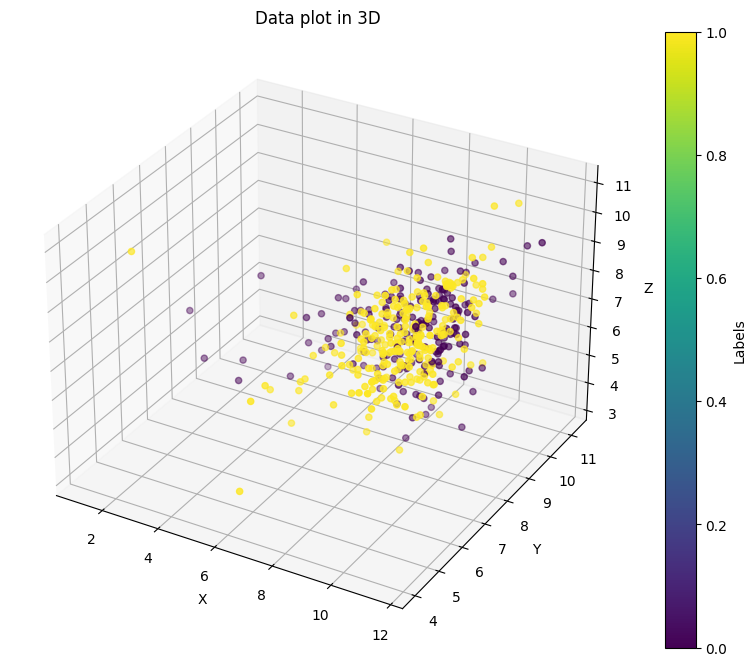

In [69]:
# Extract the individual columns
x = log_data[:, _x]
y = log_data[:, _y]
z = log_data[:, _z]

# Set the figure size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot with colored points based on labels
scatter = ax.scatter(x, y, z, c=idx)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Data plot in 3D')

# Add a colorbar for the labels
cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

# Show the plot
plt.show()

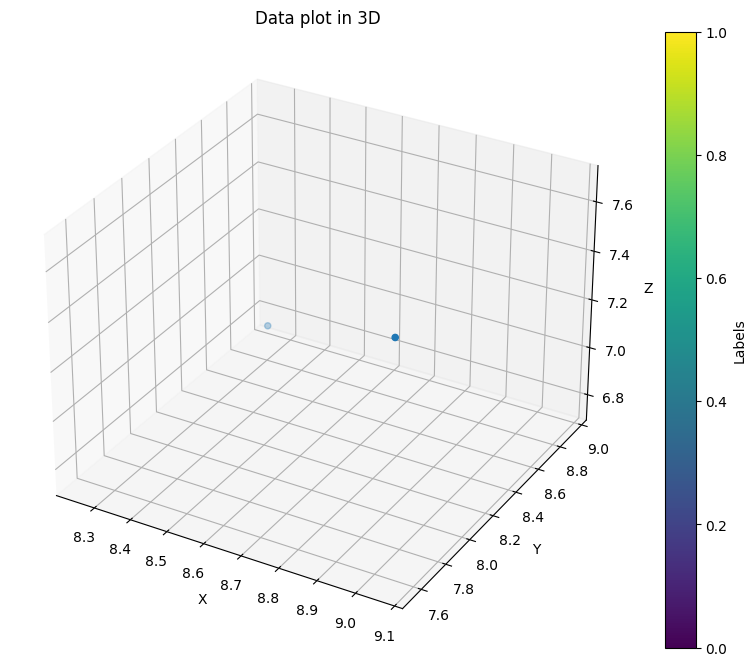

In [70]:
# Extract the individual columns
x = centroid[:, _x]
y = centroid[:, _y]
z = centroid[:, _z]

# Set the figure size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot with colored points based on labels
scatter = ax.scatter(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Data plot in 3D')

# Add a colorbar for the labels
cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

# Show the plot
plt.show()

## EM

In [11]:
from models.EM import EM

In [12]:
idx, centroid = EM(log_data, 6, 20)

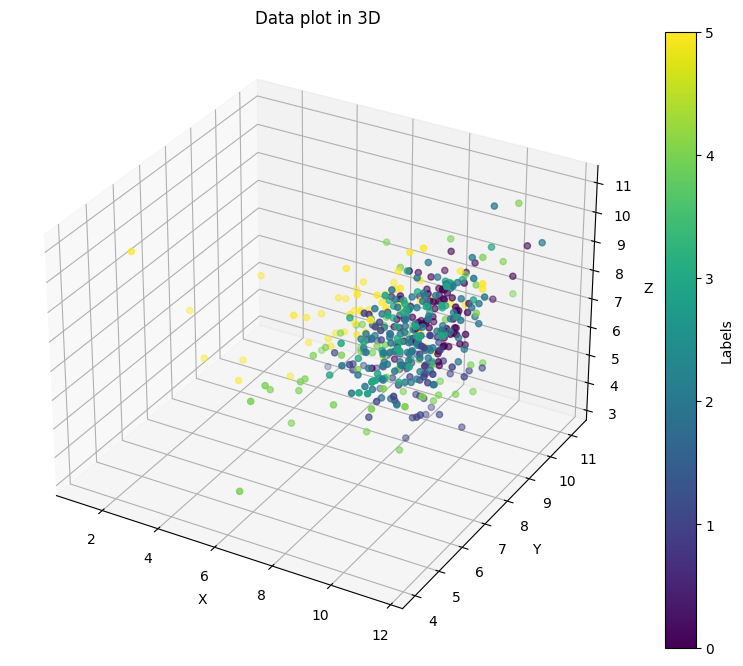

In [25]:
# Extract the individual columns
x = log_data[:, _x]
y = log_data[:, _y]
z = log_data[:, _z]

# Set the figure size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot with colored points based on labels
scatter = ax.scatter(x, y, z, c=idx)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Data plot in 3D')

# Add a colorbar for the labels
cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

# Show the plot
plt.show()

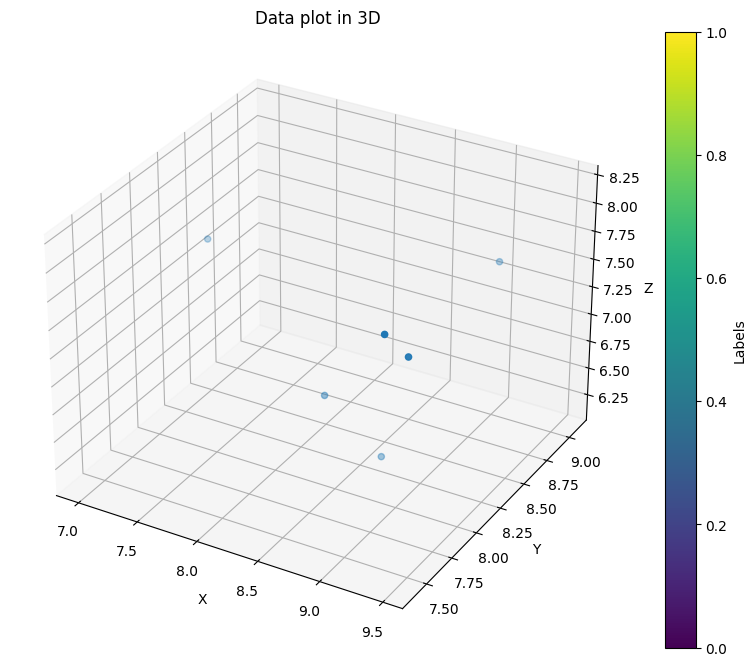

In [67]:
# Extract the individual columns
x = centroid[:, _x]
y = centroid[:, _y]
z = centroid[:, _z]

# Set the figure size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot with colored points based on labels
scatter = ax.scatter(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Data plot in 3D')

# Add a colorbar for the labels
cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

# Show the plot
plt.show()

## DBScan

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors # To decide epsilon
import kneed

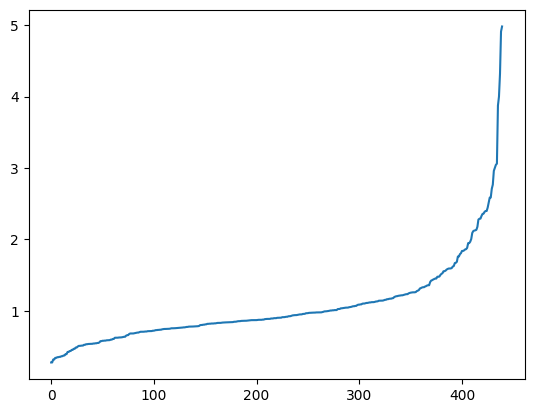

In [56]:
neighbors = NearestNeighbors(n_neighbors=12)
neighbors_fit = neighbors.fit(log_data)
distances, indices = neighbors_fit.kneighbors(log_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

2.132483543403016


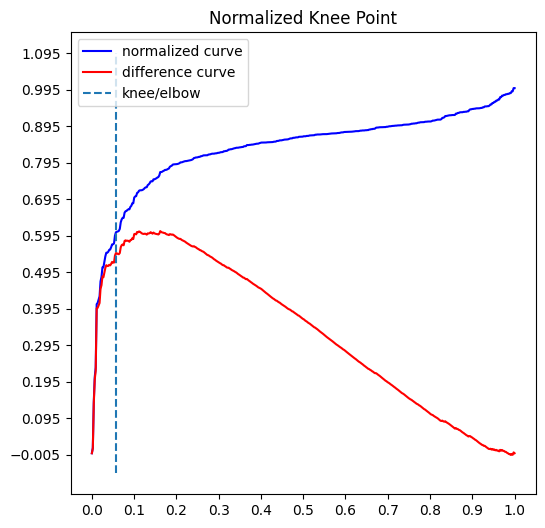

In [57]:
from kneed import KneeLocator
kneedle = KneeLocator(range(len(distances)), 
                      distances, 
                      S=1,
                      curve="convex",
                      direction="increasing")
print(kneedle.knee_y)
kneedle.plot_knee_normalized()

In [58]:
dbscan = DBSCAN(eps=2.132483543403016, min_samples=12)
idx = dbscan.fit_predict(log_data)

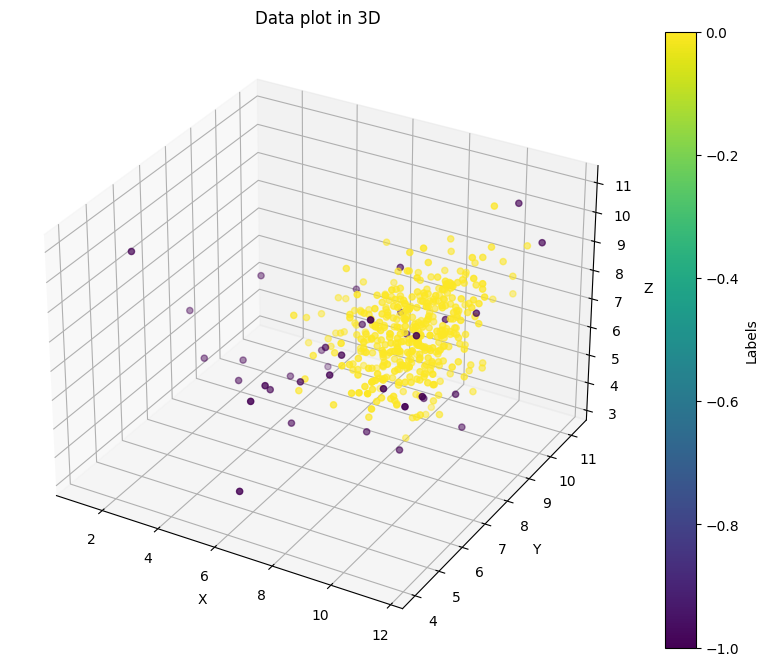

In [59]:
# Extract the individual columns
x = log_data[:, _x]
y = log_data[:, _y]
z = log_data[:, _z]

# Set the figure size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot with colored points based on labels
scatter = ax.scatter(x, y, z, c=idx)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Data plot in 3D')

# Add a colorbar for the labels
cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

# Show the plot
plt.show()